<a href="https://colab.research.google.com/github/athospugliesedev/python_codes/blob/main/Lista_8__Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [3]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

# Monta o Google Drive
drive.mount('/content/drive')

# Especifique o caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/MyDrive/dataset/insurance.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


# Baixando os dados
df = pd.read_csv(file_path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Breve descrição das colunas:


**age**: idade do beneficiário primário

**sex**: gênero do contratante

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

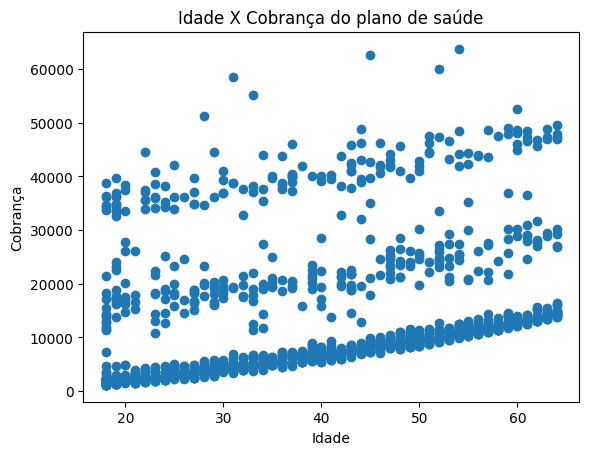

In [9]:
# Resposta
plt.scatter(df["age"], df["charges"])
plt.xlabel("Idade")
plt.ylabel("Cobrança")
plt.title("Idade X Cobrança do plano de saúde")
plt.show()


### 2)

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

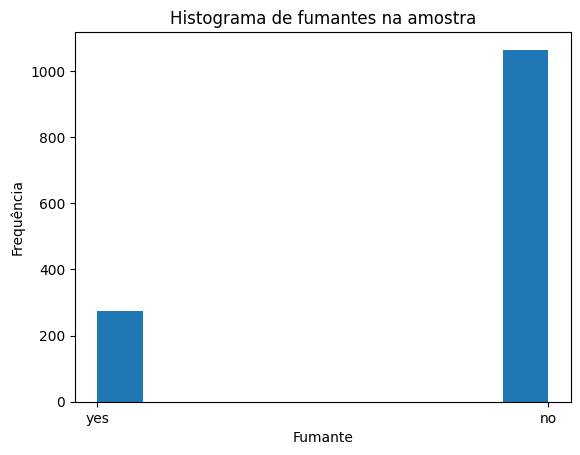

In [10]:
# Resposta
plt.hist(df["smoker"])
plt.xlabel("Fumante")
plt.ylabel("Frequência")
plt.title("Histograma de fumantes na amostra")
plt.show()


#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

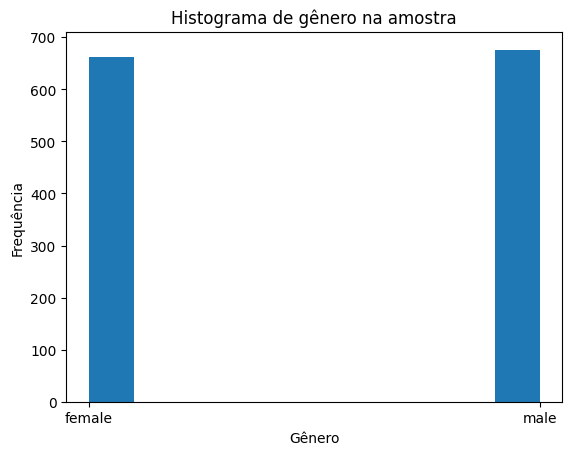

In [11]:
plt.hist(df["sex"])
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.title("Histograma de gênero na amostra")
plt.show()


#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

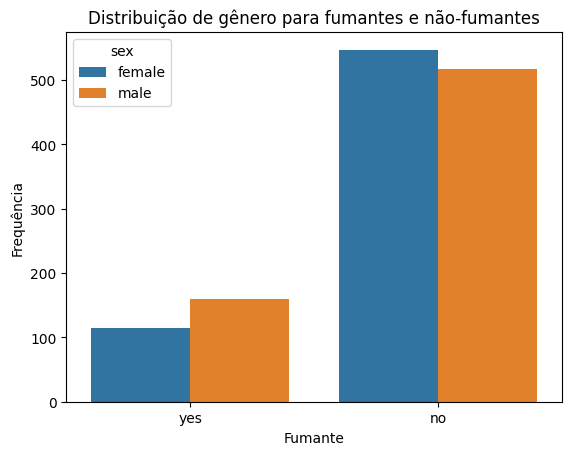

In [14]:
sns.countplot(x = "smoker", hue = "sex",  data = df)
plt.xlabel("Fumante")
plt.ylabel("Frequência")
plt.title("Distribuição de gênero para fumantes e não-fumantes")
plt.show()


### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

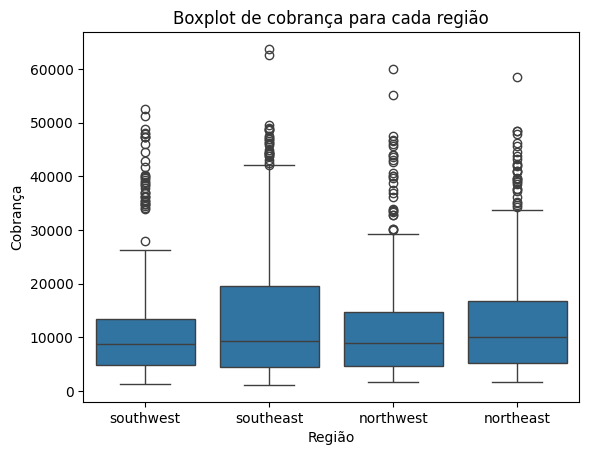

In [15]:
sns.boxplot(x = df["region"], y = df["charges"])
plt.xlabel("Região")
plt.ylabel("Cobrança")
plt.title("Boxplot de cobrança para cada região")
plt.show()


### 4) Crie gráficos que nos permitam ver a distribuição de alguns dados para cada idade na amostra.

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

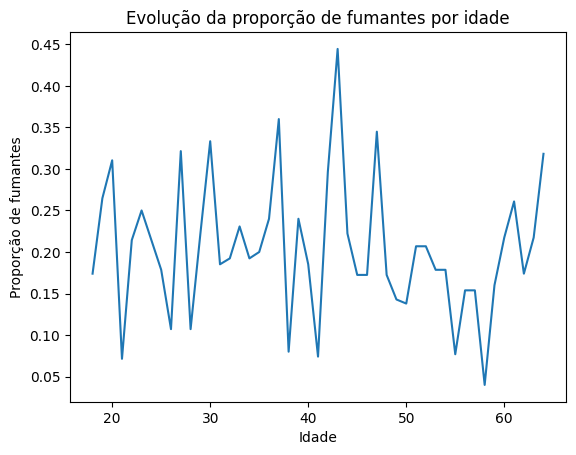

In [16]:
def prop_fumante_idade(age, data = df):
    return (len(df[(df["smoker"] == "yes") & (data["age"] == age)])/len(df[df["age"] == age]))
props = {age: prop_fumante_idade(age) for age in sorted(df["age"].unique())}
plt.plot(props.keys(), props.values())
plt.xlabel("Idade")
plt.ylabel("Proporção de fumantes")
plt.title("Evolução da proporção de fumantes por idade")
plt.show()


#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

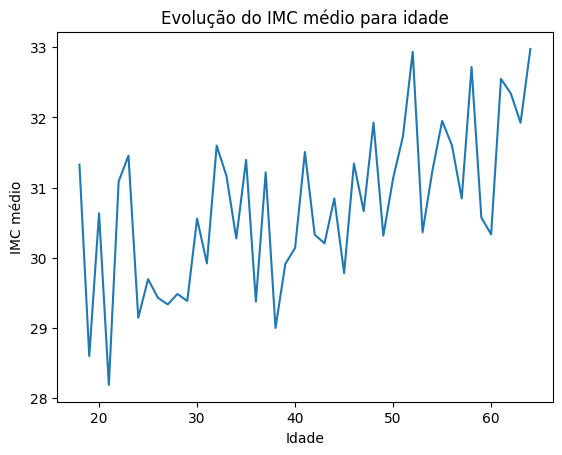

In [17]:
def IMC_medio_idade(age, data = df):

    return np.mean(df[df["age"] == age]["bmi"])
imcs = {age: IMC_medio_idade(age) for age in sorted(df["age"].unique())}
plt.plot(imcs.keys(), imcs.values())
plt.xlabel("Idade")
plt.ylabel("IMC médio")
plt.title("Evolução do IMC médio para idade")
plt.show()


#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

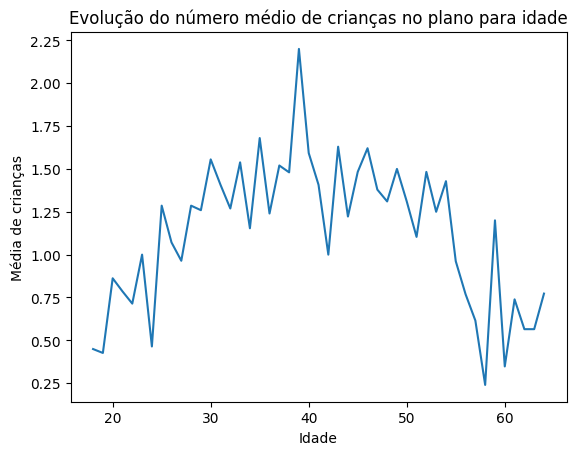

In [18]:
def media_criancas_idade(age, data = df):
    return np.mean(data[data["age"] == age]["children"])
medias = {age: media_criancas_idade(age) for age in sorted(df["age"].unique())}
plt.plot(medias.keys(), medias.values())
plt.xlabel("Idade")
plt.ylabel("Média de crianças")
plt.title("Evolução do número médio de crianças no plano para idade")
plt.show()


### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

<ipython-input-19-334336c23127>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


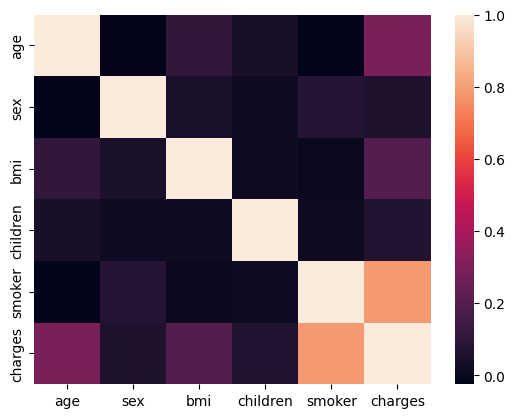

In [19]:
bin_genero = df["sex"].apply(lambda x: 1 if x == "male" else 0)
bin_smoker = df["smoker"].apply(lambda x: 1 if x == "yes" else 0)
df = df.copy()
df["sex"], df["smoker"] = bin_genero, bin_smoker
corrs = df.corr()
sns.heatmap(corrs)
plt.show()


### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes
dica: o nome da função na biblioteca é ```.box()```

In [20]:
px.box(x = "smoker", y = "charges", data_frame = df, title = "Distribuição de cobrança para fumantes e não fumantes")
